In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2025-02-01 08:35:30.398668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-01 08:35:30.416534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738398930.436410    1053 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738398930.442675    1053 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-01 08:35:30.462436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=_URL, extract=True)

In [5]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/home/jovyan/.keras/datasets
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train/cats
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train/dogs
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/cats
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/dogs


In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir), "cats_and_dogs_filtered_extracted/cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")


In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print("Total training cat images:", num_cats_tr)
print("Total training dog images:", num_dogs_tr)

print("Total validation cat images:", num_cats_val)
print("Total validation dog images:", num_dogs_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total training images: 2000
Total validation images: 1000


In [11]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode="binary")


Found 2000 images belonging to 2 classes.


In [15]:
!pip install jupysql-plugin

In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode="binary")

Found 1000 images belonging to 2 classes.


In [18]:
sample_training_images, _ = next(train_data_gen)

In [23]:
def plotImages(images_dir):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_dir, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

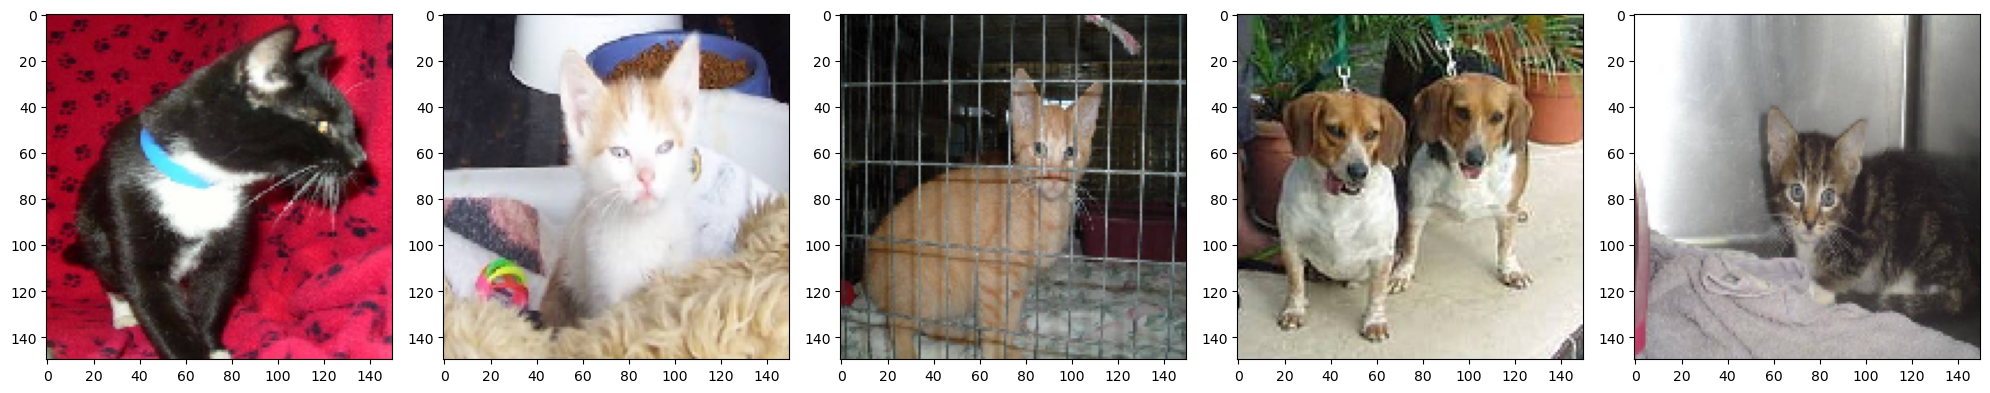

In [24]:
plotImages(sample_training_images[:5])

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(2)
])

I0000 00:00:1738400731.655735    1053 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [29]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
EPOCHS = 50
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1738401363.269689    2707 service.cc:148] XLA service 0x7fb3b401e560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738401363.269717    2707 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-02-01 09:16:03.315537: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738401363.520634    2707 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-01 09:16:03.922559: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[100,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode"

 2/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5375 - loss: 0.9824

I0000 00:00:1738401368.485812    2707 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5209 - loss: 0.8429

2025-02-01 09:16:11.859227: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[100,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-01 09:16:11.994941: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[100,64,72,72]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,32,74,74]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 295ms/step - accuracy: 0.5204 - loss: 0.8385 - val_accuracy: 0.5000 - val_loss: 0.6872
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.5472 - loss: 0.6850 - val_accuracy: 0.6190 - val_loss: 0.6669
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.6230 - loss: 0.6576 - val_accuracy: 0.5580 - val_loss: 0.6785
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.6298 - loss: 0.6544 - val_accuracy: 0.6680 - val_loss: 0.6153
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6784 - loss: 0.6172 - val_accuracy: 0.6550 - val_loss: 0.6393
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6888 - loss: 0.6126 - val_accuracy: 0.6620 - val_loss: 0.6058
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.7152 - loss: 0.5649 - val_accuracy: 0.6490 - val_loss: 0.6160
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.7374 - loss: 0.5186 - val_accuracy: 0.6750 - val

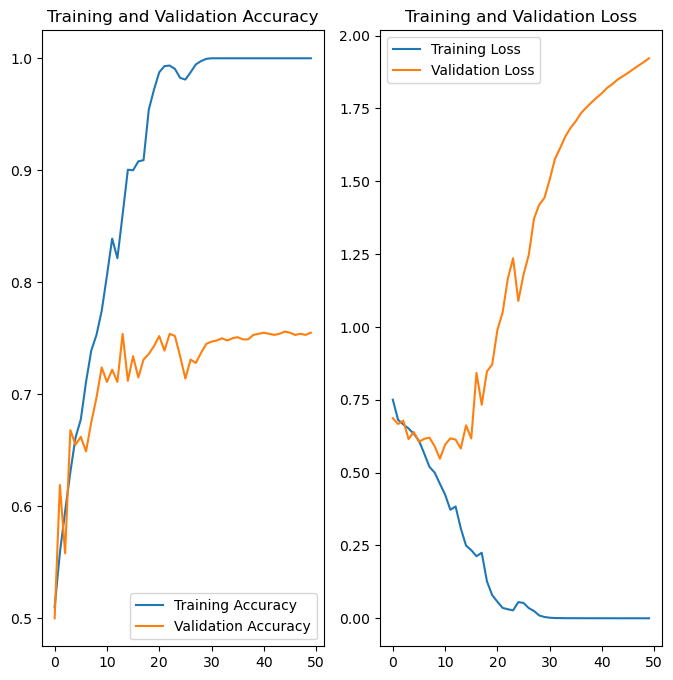

In [35]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper left")
plt.title("Training and Validation Loss")
plt.savefig("./foo.png")
plt.show()